### Task 1 - Data Collection
Here you will obtain the required data for the analysis. As described in the project instructions, you will perform a web scrap to obtain data from the NCDC website, import data from the John Hopkins repository, and import the provided external data.


### A - NCDC Website scrap
Website - https://covid19.ncdc.gov.ng/

In [2]:
# Write Your Code Below
# Import all libraries in this cell
import os
import glob
from IPython.display import display
#End of my imports

import requests
import numpy as np
import urllib.request
import pandas as pd
import csv
from bs4 import BeautifulSoup
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')


In [3]:
# Save the data to a DataFrame object.
url = 'https://covid19.ncdc.gov.ng/'
tables = pd.read_html(url)
dataframes ={}

ncdc = tables[0]
dataframes['ncdc'] = ncdc


### B - John Hopkins Data Repository
Here you will obtain data from the John Hopkins repository. Your task here involves saving the data from the GitHub repo link to DataFrame for further analysis. Find the links below. 
* Global Daily Confirmed Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv)
* Global Daily Recovered Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv)
* Global Daily Death Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv)

In [4]:
#Scraping global confirmed cases
gcc =pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
dataframes['gcc']=gcc

In [5]:
#Scaraping global recovered cases
grc = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
dataframes['grc']=grc

In [6]:
#Scraping global discovered cases
gdc = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
dataframes['gdc'] = gdc

### C - External Data 
* Save the external data to a DataFrame
* External Data includes but not limited to: `covid_external.csv`, `Budget data.csv`, `RealGDP.csv`

In [7]:
#Loading external data
externals = glob.glob('*.csv')
for file in externals:
    dataframes[file[0:-4].lower().replace(" ", "_")] = pd.read_csv(file)
    
dataframes.keys()


dict_keys(['ncdc', 'gcc', 'grc', 'gdc', 'budget_data', 'covidnig', 'covid_external', 'realgdp'])

### Task 2 - View the data
Obtain basic information about the data using the `head()` and `info()` method.

In [8]:
#Seeing the top 5 rows of all loaded DataDrames
for dataframe in dataframes:
    display(dataframes[dataframe].head())

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,76374,3360,72350,664
1,FCT,21682,1080,20421,181
2,Rivers,11933,440,11339,154
3,Kaduna,9580,128,9381,71
4,Plateau,9351,110,9178,63


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/15/21,9/16/21,9/17/21,9/18/21,9/19/21,9/20/21,9/21/21,9/22/21,9/23/21,9/24/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,154283,154361,154487,154487,154487,154585,154712,154757,154800,154960
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,159423,160365,161324,162173,162953,163404,164276,165096,165864,166690
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,200770,200989,201224,201425,201600,201766,201948,202122,202283,202449
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,15108,15113,15124,15124,15124,15140,15140,15153,15156,15167
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,51407,51827,52208,52307,52307,52644,52968,53387,53840,54280


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/15/21,9/16/21,9/17/21,9/18/21,9/19/21,9/20/21,9/21/21,9/22/21,9/23/21,9/24/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/15/21,9/16/21,9/17/21,9/18/21,9/19/21,9/20/21,9/21/21,9/22/21,9/23/21,9/24/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7174,7183,7186,7186,7186,7199,7199,7199,7199,7199
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2557,2563,2569,2574,2580,2587,2594,2601,2609,2619
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,5630,5651,5670,5681,5694,5709,5725,5739,5748,5758
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,130,130,130,130,130,130,130,130,130,130
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1360,1371,1378,1388,1388,1409,1414,1434,1460,1471


,states,Initial_budget (Bn),Revised_budget (Bn)
0,Abia,136.60,102.70
1,Adamawa,183.30,139.31
2,Akwa-Ibom,597.73,366.00
3,Anambra,137.10,112.80
4,Bauchi,167.20,128.00


,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"26,708","2,435","24,037",236
1,FCT,"9,627","2,840","6,694",93
2,Kaduna,"4,504",579,"3,877",48
3,Plateau,"4,262",280,"3,948",34
4,Oyo,"3,788",368,"3,374",46


,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93
3,Nassarawa,North Central,2783000,0.1,0.3,0.5,0.9,0.0,0.1,0.6,0.5,0.85
4,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84


,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59


In [9]:
#Viewing information of all loaded DataFrames
for dataframe in dataframes:
    print(dataframe.upper())
    display(dataframes[dataframe].info())

NCDC
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     int64 
 2   No. of Cases (on admission)   37 non-null     int64 
 3   No. Discharged                37 non-null     int64 
 4   No. of Deaths                 37 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.6+ KB


None

GCC
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Columns: 616 entries, Province/State to 9/24/21
dtypes: float64(2), int64(612), object(2)
memory usage: 1.3+ MB


None

GRC
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Columns: 616 entries, Province/State to 9/24/21
dtypes: float64(2), int64(612), object(2)
memory usage: 1.2+ MB


None

GDC
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Columns: 616 entries, Province/State to 9/24/21
dtypes: float64(2), int64(612), object(2)
memory usage: 1.3+ MB


None

BUDGET_DATA
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   states               37 non-null     object 
 1   Initial_budget (Bn)  37 non-null     float64
 2   Revised_budget (Bn)  37 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1016.0+ bytes


None

COVIDNIG
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     object
 2   No. of Cases (on admission)   37 non-null     object
 3   No. Discharged                37 non-null     object
 4   No. of Deaths                 37 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 1.6+ KB


None

COVID_EXTERNAL
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   states                   37 non-null     object 
 1   region                   37 non-null     object 
 2   Population               37 non-null     int64  
 3   Overall CCVI Index       37 non-null     float64
 4   Age                      37 non-null     float64
 5   Epidemiological          37 non-null     float64
 6   Fragility                37 non-null     float64
 7   Health System            37 non-null     float64
 8   Population Density       37 non-null     float64
 9   Socio-Economic           37 non-null     float64
 10   Transport Availability  37 non-null     float64
 11  Acute IHR                37 non-null     float64
dtypes: float64(9), int64(1), object(2)
memory usage: 3.6+ KB


None

REALGDP
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    7 non-null      int64  
 1   Q1      7 non-null      float64
 2   Q2      7 non-null      float64
 3   Q3      7 non-null      float64
 4   Q4      7 non-null      float64
dtypes: float64(4), int64(1)
memory usage: 408.0 bytes


None

### Task 3 - Data Cleaning and Preparation
From the information obtained above, you will need to fix the data format. 
<br>
Examples: 
* Convert to appropriate data type.
* Rename the columns of the scraped data.
* Remove comma(,) in numerical data
* Extract daily data for Nigeria from the Global daily cases data

TODO A - Clean the scraped data

In [10]:
#Viewing information of NCDC dataframe
ncdc = dataframes['ncdc']
ncdc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     int64 
 2   No. of Cases (on admission)   37 non-null     int64 
 3   No. Discharged                37 non-null     int64 
 4   No. of Deaths                 37 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.6+ KB


In [11]:
#Viewing all rows of NCDC DataFrame
ncdc

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,76374,3360,72350,664
1,FCT,21682,1080,20421,181
2,Rivers,11933,440,11339,154
3,Kaduna,9580,128,9381,71
4,Plateau,9351,110,9178,63
5,Oyo,8668,618,7859,191
6,Edo,6339,787,5336,216
7,Ogun,5354,31,5244,79
8,Ondo,4446,149,4206,91
9,Akwa Ibom,4319,563,3714,42


In [12]:
#checking statistics of each column to optimize for space
ncdc.iloc[:,:].describe()

,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
count,37.000000,37.000000,37.000000,37.000000
mean,5513.270270,247.891892,5193.162162,72.216216
std,12682.934323,588.425809,12017.232085,113.145466
min,5.000000,-6.000000,3.000000,2.000000
25%,1157.000000,14.000000,1072.000000,24.000000
50%,2220.000000,47.000000,2182.000000,35.000000
75%,4319.000000,149.000000,4010.000000,79.000000
max,76374.000000,3360.000000,72350.000000,664.000000


In [13]:
#We can use a lesser type since the values are not large.
ncdc_reduced = ncdc.astype({'No. of Cases (Lab Confirmed)':'int32',
                            'No. of Cases (on admission)':'int16',
                            'No. Discharged':'int16',
                            'No. of Deaths':'int16'
                           })
ncdc_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     int32 
 2   No. of Cases (on admission)   37 non-null     int16 
 3   No. Discharged                37 non-null     int16 
 4   No. of Deaths                 37 non-null     int16 
dtypes: int16(3), int32(1), object(1)
memory usage: 794.0+ bytes


In [14]:
gcc.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/15/21,9/16/21,9/17/21,9/18/21,9/19/21,9/20/21,9/21/21,9/22/21,9/23/21,9/24/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,154283,154361,154487,154487,154487,154585,154712,154757,154800,154960
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,159423,160365,161324,162173,162953,163404,164276,165096,165864,166690
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,200770,200989,201224,201425,201600,201766,201948,202122,202283,202449
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,15108,15113,15124,15124,15124,15140,15140,15153,15156,15167
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,51407,51827,52208,52307,52307,52644,52968,53387,53840,54280


In [15]:
#Extract Nigeria data from global Covid-19 cases

grc = dataframes['grc']
gdc = dataframes['gdc']


grc_ng = grc.loc[grc['Country/Region']== 'Nigeria']
gdc_ng = gdc.loc[gdc['Country/Region']=='Nigeria']
gcc_ng = gcc.loc[gcc['Country/Region']== 'Nigeria']

In [16]:
gcc_ng

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/15/21,9/16/21,9/17/21,9/18/21,9/19/21,9/20/21,9/21/21,9/22/21,9/23/21,9/24/21
202,NaN,Nigeria,9.082,8.6753,0,0,0,0,0,0,...,200356,200356,201294,201630,201798,202191,202704,203081,203514,203991


In [17]:
grc_ng

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/15/21,9/16/21,9/17/21,9/18/21,9/19/21,9/20/21,9/21/21,9/22/21,9/23/21,9/24/21
187,NaN,Nigeria,9.082,8.6753,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
gdc_ng

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/15/21,9/16/21,9/17/21,9/18/21,9/19/21,9/20/21,9/21/21,9/22/21,9/23/21,9/24/21
202,NaN,Nigeria,9.082,8.6753,0,0,0,0,0,0,...,2640,2640,2649,2654,2655,2661,2664,2666,2668,2671


In [19]:
#clean Budget Data.csv
budget_data = dataframes['budget_data']
budget_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   states               37 non-null     object 
 1   Initial_budget (Bn)  37 non-null     float64
 2   Revised_budget (Bn)  37 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1016.0+ bytes


In [20]:
budget_data.describe()

,Initial_budget (Bn),Revised_budget (Bn)
count,37.00000,37.000000
mean,276.22027,171.092432
std,299.37630,142.974439
min,108.00000,62.960000
25%,152.92000,108.300000
50%,183.30000,128.800000
75%,242.18000,174.000000
max,1680.00000,920.500000


In [21]:
#budget_data = budget_data.astype({'Initial_budget (Bn)':'float16', 'Revised_budget (Bn)':'float16'})
#budget_data.info()
#budget_data.describe()

In [22]:
#Removing commas from columns and cast to integer
covidnig = dataframes['covidnig']
for num in range(1, 4):
    covidnig.iloc[:,num] = (covidnig.iloc[:,num]
                      .str.replace(',', '')
                      .astype('int16'))

    


In [23]:
covidnig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     int16 
 2   No. of Cases (on admission)   37 non-null     int16 
 3   No. Discharged                37 non-null     int16 
 4   No. of Deaths                 37 non-null     int64 
dtypes: int16(3), int64(1), object(1)
memory usage: 942.0+ bytes


In [24]:
realgdp = dataframes['realgdp']
realgdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    7 non-null      int64  
 1   Q1      7 non-null      float64
 2   Q2      7 non-null      float64
 3   Q3      7 non-null      float64
 4   Q4      7 non-null      float64
dtypes: float64(4), int64(1)
memory usage: 408.0 bytes


TODO B - Get a Pandas DataFrame for Daily Confirmed Cases in Nigeria. Columns are Date and Cases

In [25]:
# Extract Daily Confirmed Cases in Nigeria
gcc = dataframes['gcc']
gcc_ng = gcc.loc[gcc['Country/Region']=='Nigeria']
# Tidy the dataframe from wide data to long data
gcc_melt = pd.melt(gcc_ng, 
        id_vars=["Province/State","Country/Region","Lat","Long"], 
        var_name="date", value_name="cases")

# Cast the date column to correct Pandas type
gcc_melt['date'] = pd.to_datetime(gcc_melt['date'])


In [26]:
#Change column name of gcc cases
gcc_melt['gcc_cases'] = gcc_melt.cases
gcc_melt.tail()

,Province/State,Country/Region,Lat,Long,date,cases,gcc_cases
607,NaN,Nigeria,9.082,8.6753,2021-09-20,202191,202191
608,NaN,Nigeria,9.082,8.6753,2021-09-21,202704,202704
609,NaN,Nigeria,9.082,8.6753,2021-09-22,203081,203081
610,NaN,Nigeria,9.082,8.6753,2021-09-23,203514,203514
611,NaN,Nigeria,9.082,8.6753,2021-09-24,203991,203991


TODO C - Get a Pandas DataFrame for Daily Recovered Cases in Nigeria. Columns are Date and Cases

In [27]:
#Repeat data loading, melting and casting for Nigeria Recovered cases 
grc = dataframes['grc']
grc_ng = grc.loc[grc['Country/Region']=='Nigeria']
grc_melt = pd.melt(grc_ng, 
        id_vars=["Province/State","Country/Region","Lat","Long"], 
        var_name="date", value_name="cases")


grc_melt['date'] = pd.to_datetime(grc_melt['date'])

In [28]:
grc_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  0 non-null      object        
 1   Country/Region  612 non-null    object        
 2   Lat             612 non-null    float64       
 3   Long            612 non-null    float64       
 4   date            612 non-null    datetime64[ns]
 5   cases           612 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 28.8+ KB


In [29]:
grc_melt['grc_cases'] = grc_melt.cases

In [30]:
grc_melt.head()

,Province/State,Country/Region,Lat,Long,date,cases,grc_cases
0,NaN,Nigeria,9.082,8.6753,2020-01-22,0,0
1,NaN,Nigeria,9.082,8.6753,2020-01-23,0,0
2,NaN,Nigeria,9.082,8.6753,2020-01-24,0,0
3,NaN,Nigeria,9.082,8.6753,2020-01-25,0,0
4,NaN,Nigeria,9.082,8.6753,2020-01-26,0,0


TODO D - Get a Pandas DataFrame for Daily Death Cases in Nigeria. Columns are Date and Cases

In [31]:
# Repeat the loading, melting and casting for Nigeria Discovered cases
gdc = dataframes['gdc']
gdc_ng = gdc.loc[gdc['Country/Region']=='Nigeria']
gdc_melt = pd.melt(gdc_ng, 
        id_vars=["Province/State","Country/Region","Lat","Long"], 
        var_name="date", value_name="cases")


gdc_melt['date'] = pd.to_datetime(gdc_melt['date'])

In [32]:
gdc_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  0 non-null      object        
 1   Country/Region  612 non-null    object        
 2   Lat             612 non-null    float64       
 3   Long            612 non-null    float64       
 4   date            612 non-null    datetime64[ns]
 5   cases           612 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 28.8+ KB


In [33]:
# giving the right prefix to the column
gdc_melt['gdc_cases'] = gdc_melt.cases

In [34]:
gdc_melt.tail()

,Province/State,Country/Region,Lat,Long,date,cases,gdc_cases
607,NaN,Nigeria,9.082,8.6753,2021-09-20,2661,2661
608,NaN,Nigeria,9.082,8.6753,2021-09-21,2664,2664
609,NaN,Nigeria,9.082,8.6753,2021-09-22,2666,2666
610,NaN,Nigeria,9.082,8.6753,2021-09-23,2668,2668
611,NaN,Nigeria,9.082,8.6753,2021-09-24,2671,2671


In [35]:

ng_cases = pd.concat([gdc_melt, grc_melt, gcc_melt], axis=1).drop_duplicates()
ng_cases =ng_cases.T.drop_duplicates().T
ng_cases.columns= ['Province/State','Country/Region','Lat','Long','date','gdc_cases','grc_cases','gcc_cases']
ng_cases.tail()

,Province/State,Country/Region,Lat,Long,date,gdc_cases,grc_cases,gcc_cases
607,NaN,Nigeria,9.082,8.6753,2021-09-20,2661,0,202191
608,NaN,Nigeria,9.082,8.6753,2021-09-21,2664,0,202704
609,NaN,Nigeria,9.082,8.6753,2021-09-22,2666,0,203081
610,NaN,Nigeria,9.082,8.6753,2021-09-23,2668,0,203514
611,NaN,Nigeria,9.082,8.6753,2021-09-24,2671,0,203991


### Task 4 - Analysis
Here you will perform some analyses on the datasets. You are welcome to communicate findings in charts and summary. 
<br>
We have included a few TODOs to help with your analysis. However, do not let this limit your approach, feel free to include more, and be sure to support your findings with chart and summary 

TODO A - Generate a plot that shows the Top 10 states in terms of Confirmed Covid cases by Laboratory test

<AxesSubplot:xlabel='No. of Cases (Lab Confirmed)', ylabel='States Affected'>

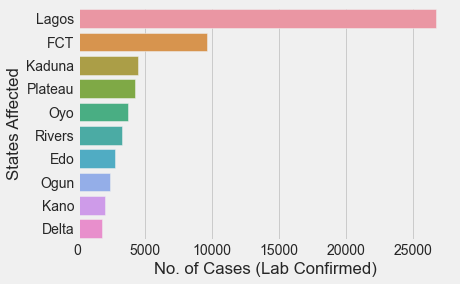

In [36]:
#sns.color_palette("ch:s=-.2,r=.6", as_cmap=True)

sns.barplot(x='No. of Cases (Lab Confirmed)', 
             y='States Affected', 
            data=covidnig.sort_values(by='No. of Cases (Lab Confirmed)', ascending=False).head(10) )

TODO B - Generate a plot that shows the Top 10 states in terms of Discharged Covid cases. Hint - Sort the values

<AxesSubplot:xlabel='No. Discharged', ylabel='States Affected'>

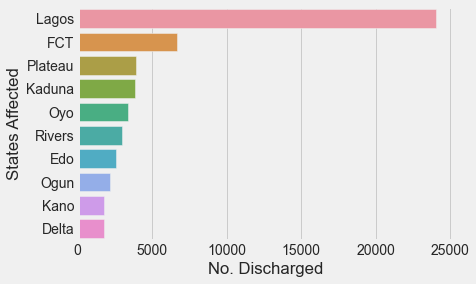

In [37]:
sns.barplot(x='No. Discharged', 
             y='States Affected', 
            data=covidnig.sort_values(by='No. Discharged', ascending=False).head(10) )

TODO D - Plot the top 10 Death cases

<AxesSubplot:xlabel='No. of Deaths', ylabel='States Affected'>

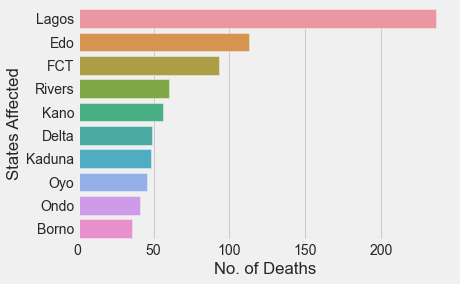

In [38]:
sns.barplot(x='No. of Deaths', 
             y='States Affected', 
            data=covidnig.sort_values(by='No. of Deaths', ascending=False).head(10) )

TODO E - Generate a line plot for the total daily confirmed, recovered and death cases in Nigeria

<AxesSubplot:xlabel='date', ylabel='gcc_cases'>

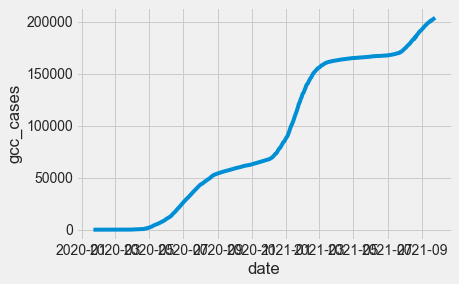

In [39]:
gcc_melt.head()
sns.lineplot(x='date', y='gcc_cases', data=gcc_melt)

<AxesSubplot:xlabel='date', ylabel='grc_cases'>

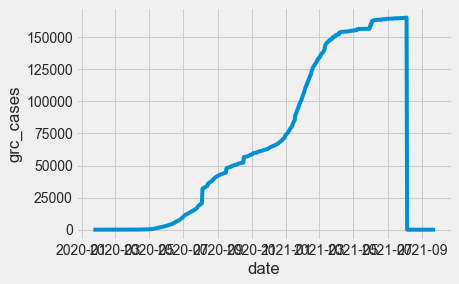

In [40]:
grc_melt.head()
sns.lineplot(x='date', y='grc_cases', data=grc_melt)

<AxesSubplot:xlabel='date', ylabel='gdc_cases'>

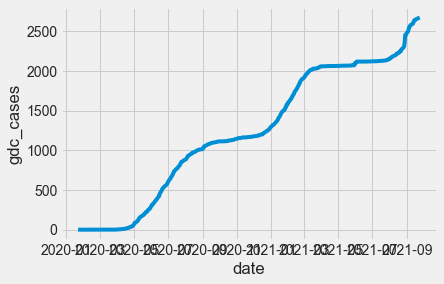

In [41]:
gdc_melt.head()
sns.lineplot(x='date', y='gdc_cases', data=gdc_melt)

TODO F - 
* Determine the daily infection rate, you can use the Pandas `diff` method to find the derivate of the total cases.
* Generate a line plot for the above

In [42]:
# pd.df(gdc_melt.iloc[[]])
daily_ir = gdc_melt.iloc[:, -3:-1]
daily_ir.diff()

,date,cases
0,NaT,NaN
1,1 days,0.0
2,1 days,0.0
3,1 days,0.0
4,1 days,0.0
...,...,...
607,1 days,6.0
608,1 days,3.0
609,1 days,2.0
610,1 days,2.0


<AxesSubplot:xlabel='date', ylabel='cases'>

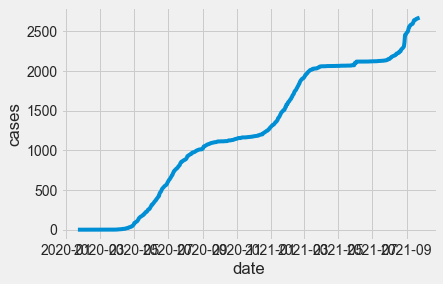

In [43]:
sns.lineplot(data=daily_ir, x='date', y='cases')

TODO G - 
* Calculate maximum infection rate for a day (Number of new cases)
* Find the date

In [44]:
daily_ir['cases'].max()

2671

In [45]:
daily_ir[daily_ir.cases==2619]

,date,cases
600,2021-09-13,2619


TODO H - Determine the relationship between the external dataset and the NCDC COVID-19 dataset. 
Here you will generate a line plot of top 10 confirmed cases and the overall community vulnerability index on the same axis. From the graph, explain your observation.
<br>
Steps
* Combine the two dataset together on a common column(states)
* Create a new dataframe for plotting. This DataFrame will contain top 10 states in terms of confirmed cases i.e sort by confirmed cases. ** Hint: Check out Pandas [nlargest](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nlargest.html) function. This [tutorial](https://cmdlinetips.com/2019/03/how-to-select-top-n-rows-with-the-largest-values-in-a-columns-in-pandas/) can help out ** 
* Plot both variable on the same axis. Check out this [tutorial](http://kitchingroup.cheme.cmu.edu/blog/2013/09/13/Plotting-two-datasets-with-very-different-scales/)

In [46]:
ncdc = dataframes['ncdc']
external = dataframes['covid_external']

In [47]:
ncdc.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,76374,3360,72350,664
1,FCT,21682,1080,20421,181
2,Rivers,11933,440,11339,154
3,Kaduna,9580,128,9381,71
4,Plateau,9351,110,9178,63


In [48]:
ncdc_external = ncdc.join(external.set_index('states'), on='States Affected')
ncdc_external.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   States Affected               37 non-null     object 
 1   No. of Cases (Lab Confirmed)  37 non-null     int64  
 2   No. of Cases (on admission)   37 non-null     int64  
 3   No. Discharged                37 non-null     int64  
 4   No. of Deaths                 37 non-null     int64  
 5   region                        35 non-null     object 
 6   Population                    35 non-null     float64
 7   Overall CCVI Index            35 non-null     float64
 8   Age                           35 non-null     float64
 9   Epidemiological               35 non-null     float64
 10  Fragility                     35 non-null     float64
 11  Health System                 35 non-null     float64
 12  Population Density            35 non-null     float64
 13  Socio-E

In [49]:
top_10 = ncdc_external.nlargest(10, 'No. of Cases (Lab Confirmed)')
top_10

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,Lagos,76374,3360,72350,664,South West,13992000.0,0.0,0.1,1.0,0.3,0.1,1.0,0.1,0.4,0.93
1,FCT,21682,1080,20421,181,North Central,4865000.0,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
2,Rivers,11933,440,11339,154,South South,7763000.0,0.4,0.5,0.9,0.6,0.6,0.9,0.1,0.1,1.00
3,Kaduna,9580,128,9381,71,North West,9227000.0,0.7,0.1,0.9,0.8,0.9,0.4,0.6,0.4,0.86
4,Plateau,9351,110,9178,63,North Central,4766000.0,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
5,Oyo,8668,618,7859,191,South West,8737000.0,0.2,0.7,0.8,0.2,0.8,0.6,0.2,0.3,1.06
6,Edo,6339,787,5336,216,South South,4705000.0,0.1,0.9,0.8,0.1,0.1,0.5,0.4,0.3,1.09
7,Ogun,5354,31,5244,79,South West,5878000.0,0.3,0.6,0.7,0.5,0.6,0.6,0.0,0.2,1.07
8,Ondo,4446,149,4206,91,South West,5185000.0,0.1,0.8,0.5,0.1,0.3,0.6,0.3,0.3,1.04
9,Akwa Ibom,4319,563,3714,42,South East,6093000.0,0.7,0.8,0.7,0.6,0.8,0.8,0.5,0.1,1.01


In [50]:
y1 = top_10['Overall CCVI Index']
y2 = top_10['No. of Cases (Lab Confirmed)']
states = top_10['States Affected']


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

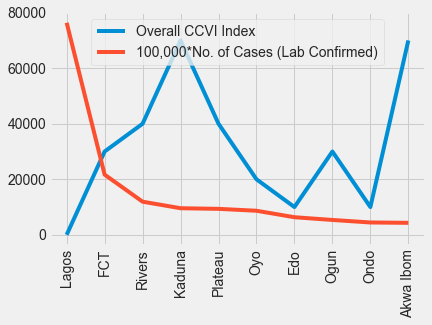

In [51]:
plt.figure()
plt.plot(states, y1*100_000, states, y2)
plt.legend(['Overall CCVI Index', '100,000*No. of Cases (Lab Confirmed)'])
plt.xticks(rotation=90)

TODO I - Determine the relationship between the external dataset and the NCDC COVID-19 dataset. 
* Here you will generate a regression plot between two variables to visualize the linear relationships - Confirmed Cases and Population Density.
Hint: Check out Seaborn [Regression Plot](https://seaborn.pydata.org/generated/seaborn.regplot.html).
* Provide a summary of your observation

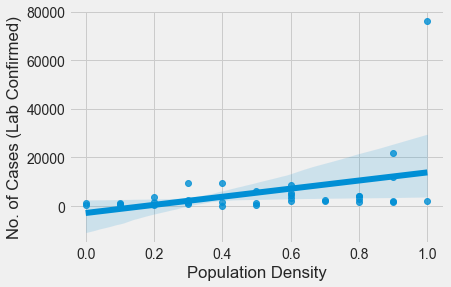

In [52]:
ax = sns.regplot(y="No. of Cases (Lab Confirmed)", x="Population Density", data=ncdc_external)

TODO J - 
* Provide more analyses by extending TODO G & H. Meaning, determine relationships between more features.
* Provide a detailed summary of your findings. 
* Note that you can have as many as possible.

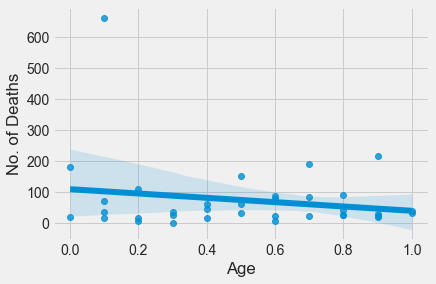

In [53]:
ax = sns.regplot(x="Age", y="No. of Deaths", data=ncdc_external)

### TODO L - 
Determine the effect of the Pandemic on the economy. To do this, you will compare the Real GDP value Pre-COVID-19 with Real GDP in 2020 (COVID-19 Period, especially Q2 2020)
<br>
Steps
* From the Real GDP Data, generate a `barplot` using the GDP values for each year & quarters. For example: On x-axis you will have year 2017 and the bars will be values of each quarters(Q1-Q4). You expected to have subplots of each quarters on one graph.
<br>
Hint: Use [Pandas.melt](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) to create your plot DataFrame 
* Set your quarter legend to lower left.
* Using `axhline`, draw a horizontal line through the graph at the value of Q2 2020.
* Write out your observation

In [54]:
dataframes.keys()
realgdp = dataframes['realgdp']
realgdp

,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59
5,2019,16434552.65,16931434.89,18494114.17,19530000.00
6,2020,16740000.00,15890000.00,17820000.00,0.00


In [55]:
realgdp_melt = realgdp.melt(id_vars=['Year'], var_name='Quarter', value_name='Real GDP')
realgdp_melt

,Year,Quarter,Real GDP
0,2014,Q1,15438679.50
1,2015,Q1,16050601.38
2,2016,Q1,15943714.54
3,2017,Q1,15797965.83
4,2018,Q1,16096654.19
5,2019,Q1,16434552.65
6,2020,Q1,16740000.00
7,2014,Q2,16084622.31
8,2015,Q2,16463341.91
9,2016,Q2,16218542.41


In [56]:
realgdp_melt[(realgdp_melt['Year'] ==2020) & (realgdp_melt['Quarter'] =='Q1')]
#  &  (realgdp_melt['Year'==2020])]['Real GDP']

,Year,Quarter,Real GDP
6,2020,Q1,16740000.0


In [59]:
q2 = realgdp_melt[realgdp_melt.Quarter=='Q2']

q2_2020 = q2[q2.Year==2020]

q2_2020= q2_2020['Real GDP'].iloc[0]

q2_2020

15890000.0

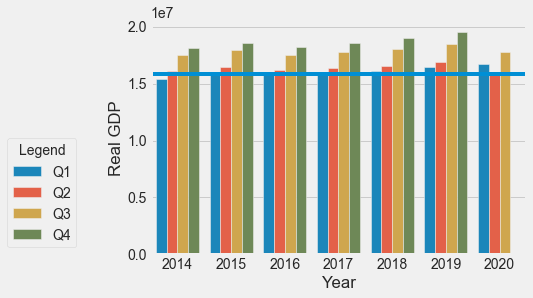

In [60]:
graph = sns.barplot(x='Year', y='Real GDP', data=realgdp_melt, hue='Quarter')
plt.legend(loc='lower left', bbox_to_anchor=(-0.4, 0), title='Legend')
graph.axhline(y=q2_2020)

# Discussion of Q2 2020

The second quarter of 2020 witnessed drastic drop in GDP. However, the country was able to recover in the third quarter.

### Note: Do not limit your analysis to the provided TODOs. Perform more analyses e.g 
* Check for more external dataset
* Ask more questions & find the right answers by exploring the data

In [67]:
covidnig = dataframes['covidnig']
covidnig_melt = covidnig.melt(id_vars='States Affected')
covidnig_melt

,States Affected,variable,value
0,Lagos,No. of Cases (Lab Confirmed),26708
1,FCT,No. of Cases (Lab Confirmed),9627
2,Kaduna,No. of Cases (Lab Confirmed),4504
3,Plateau,No. of Cases (Lab Confirmed),4262
4,Oyo,No. of Cases (Lab Confirmed),3788
...,...,...,...
143,Yobe,No. of Deaths,8
144,Kebbi,No. of Deaths,8
145,Cross River,No. of Deaths,11
146,Zamfara,No. of Deaths,5


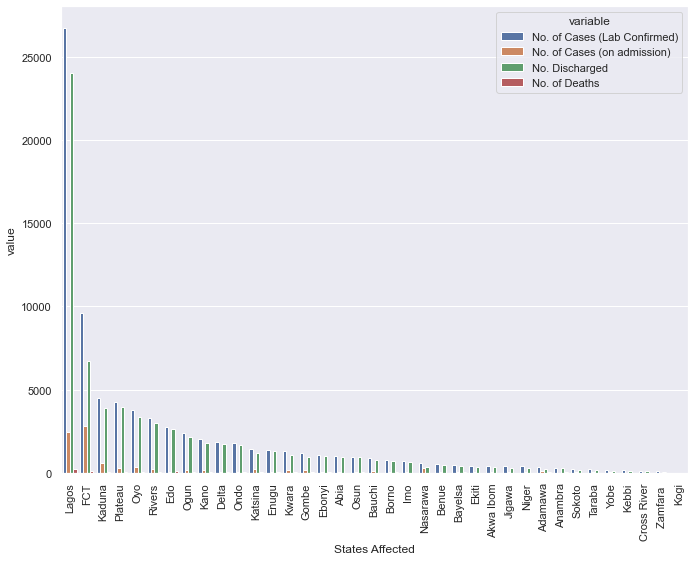

In [98]:
graph = sns.barplot(x='States Affected', y='value', data=covidnig_melt, hue='variable')
# plt.legend(loc='lower left', bbox_to_anchor=(-0.4, 0), title='Legend')

plt.xticks(rotation=90)
sns.set(rc = {'figure.figsize':(10,8)})